In [1]:
#https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset?resource=download

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



plt.rcParams["figure.figsize"] = (16,6)
data = pd.read_csv("C:/Users/Lydian/Desktop/DataSet/penguins.csv")

data = data.dropna()
nd = data.drop(data.tail((int)(len(data) * 0.9)).index)
data.head()
sex = data["sex"]

island = data["island"]
species = data["species"]

In [2]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [18]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


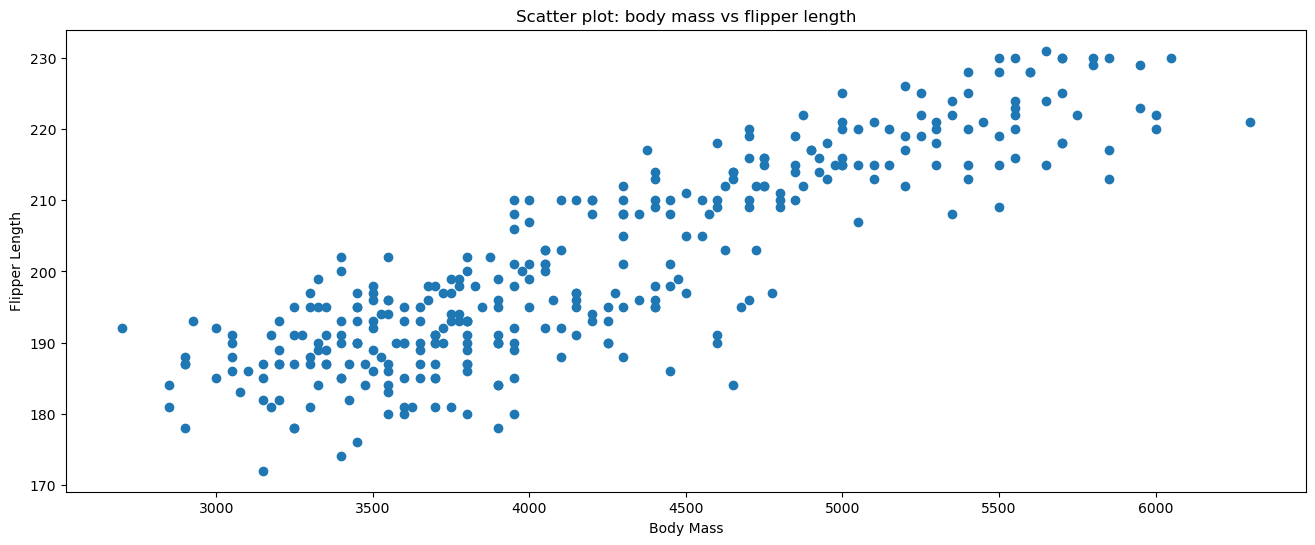

In [3]:
#numerical vs numerical
bill_length = data["bill_length_mm"]
bill_depth = data["bill_depth_mm"]
body_mass = data["body_mass_g"]

flipper_length = data["flipper_length_mm"]

plt.title("Scatter plot: body mass vs flipper length")
plt.xlabel("Body Mass")
plt.ylabel("Flipper Length")
plt.scatter(body_mass, flipper_length)



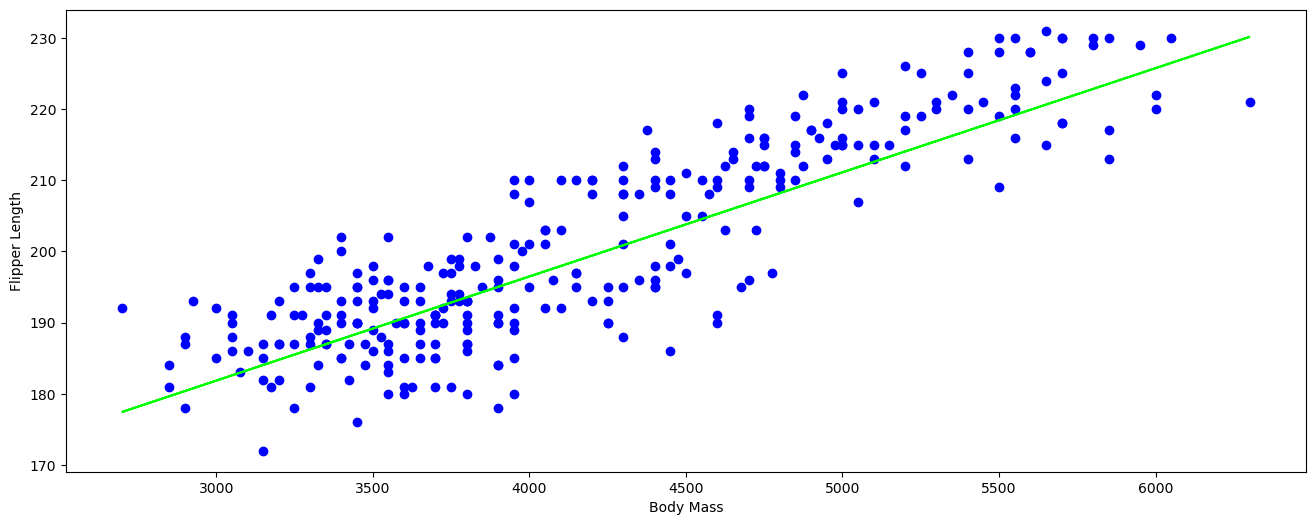

In [29]:

#numerical vs numerical
trainX, testX, trainY, testY = train_test_split(body_mass, flipper_length, test_size = 0.9)
lr = LinearRegression()
lr.fit(trainX.values.reshape(-1, 1), trainY.values.reshape(-1, 1))
yPred = lr.predict(testX.values.reshape(-1, 1))
plt.title("Linear Regression Body mass vs Flipper length")
plt.xlabel("Body Mass")
plt.ylabel("Flipper Length")
plt.plot(testX, yPred, color = "#00FF00")
plt.scatter(testX, testY, color = "#0000FF")



In [6]:
data.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<AxesSubplot:xlabel='species'>

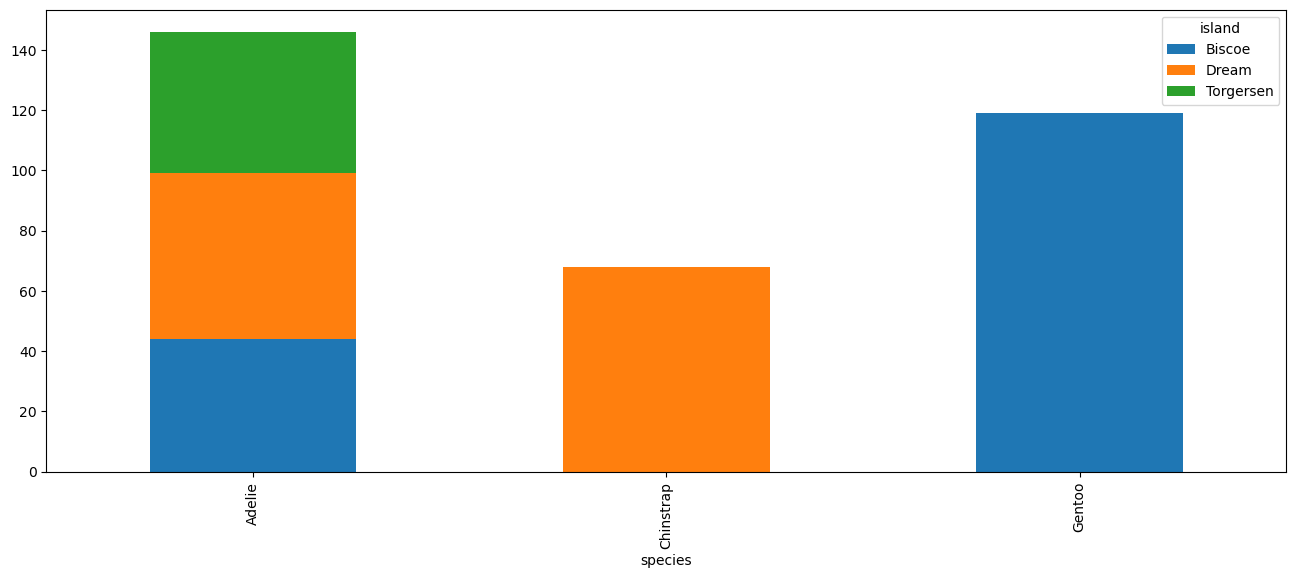

In [30]:
#cat vs cat stacked column chart

pd.crosstab(species, island).plot(kind = "bar", stacked = True)

<AxesSubplot:xlabel='species'>

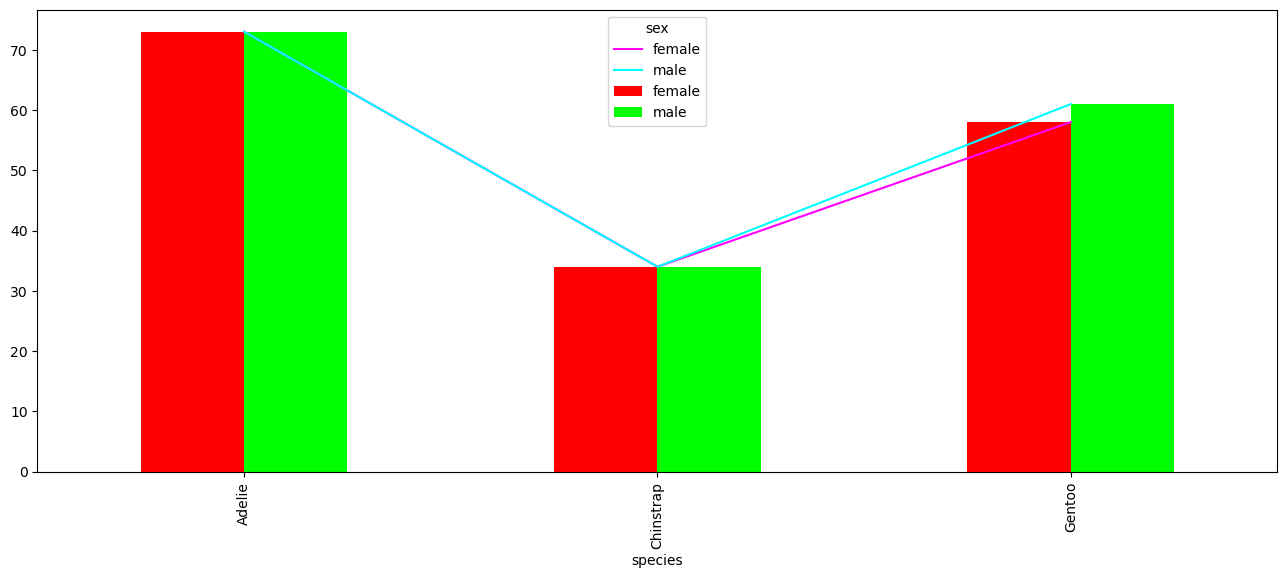

In [31]:
# cat vs cat combination chart


ax = pd.crosstab(species, sex).plot(kind = "line", color = ["#FF00FF", "#00FFFF"])
pd.crosstab(species, sex).plot(kind = "bar", ax = ax, color = ["#FF0000", "#00FF00"])


Text(0.5, 1.0, 'The average body mass of each species')

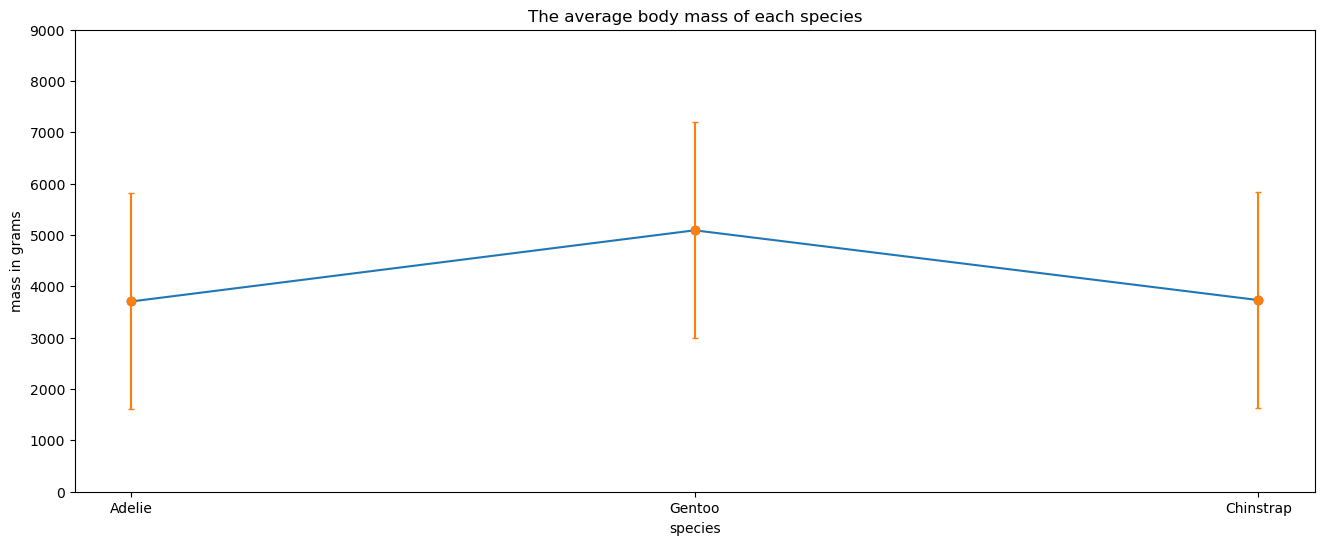

In [9]:

Adelie = data.loc[ data["species"] == "Adelie" ]
Gentoo = data.loc[ data["species"] == "Gentoo" ]
Chinstrap = data.loc[ data["species"] == "Chinstrap" ]

xVal = data["species"].unique()
yVal = [Adelie["body_mass_g"].mean(), Gentoo["body_mass_g"].mean(), Chinstrap["body_mass_g"].mean()]
yerror = data["body_mass_g"].mean() / 2

plt.ylim(0, 9000)
plt.ylabel("mass in grams")
plt.xlabel("species")
plt.plot(xVal, yVal)

plt.scatter(xVal, yVal)
plt.errorbar(xVal, yVal, yerr = yerror, fmt ='o', capsize = 2)
plt.title("The average body mass of each species")

Text(0.5, 1.0, 'Average body mass between genders')

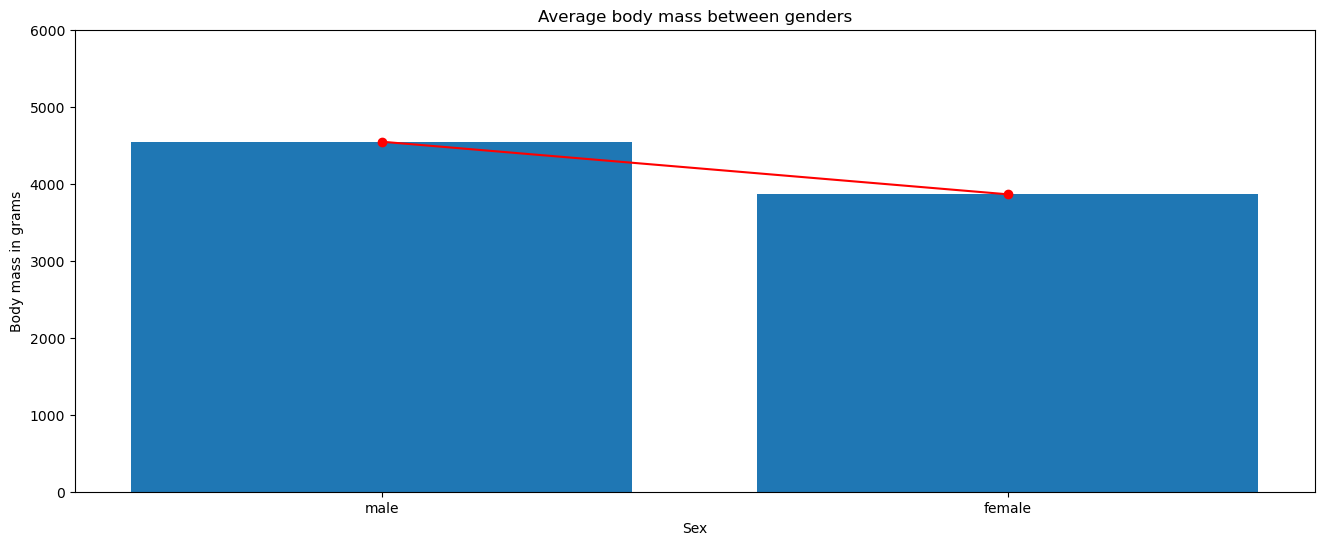

In [16]:
#combination chart categorical vs numerical


m_bmass = data[ data["sex"] == "male" ]
f_bmass = data[ data["sex"] == "female" ]
yVal = [m_bmass["body_mass_g"].mean(), f_bmass["body_mass_g"].mean()]

xVal = ["male", "female"]

plt.ylim(0, 6000)
plt.bar(xVal, yVal)
plt.ylabel("Body mass in grams")
plt.xlabel("Sex")
plt.plot(xVal, yVal, color = "#FF0000")
plt.scatter(xVal, yVal, color = "#FF0000")
plt.title("Average body mass between genders")
